In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.preprocessing import OneHotEncoder


In [2]:
import warnings
warnings.filterwarnings('ignore')

* Loading the dataset into a pandas DataFrame, and getting a visual overview!!

In [3]:
df = pd.read_csv('/content/rwsi_data.csv')
df.head(10)

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,February,Windows,Safari,North America,1.0,Returning,False,No
1,eBHG5YGyco8TRlac,4.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,February,Android,Chrome,NaN,2.0,Returning,False,No
2,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,February,MacOS,Safari,Other,3.0,Returning,False,No
3,cyOsumxkpNEvKIdc,4.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,February,iOS,NaN,Europe,4.0,Returning,False,No
4,F4rTMKOqtoPKzxw9,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,NaN,February,iOS,Internet Explorer,NaN,4.0,Returning,True,No
5,4VMhpHx3vORvMBM6,2.0,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,February,NaN,Chrome,North America,3.0,Returning,False,No
6,Sh1EYwNiXcpybejd,4.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,February,Android,Edge,Asia-Pacific,3.0,Returning,False,No
7,qAu6Pi4UMWbv6CUs,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,February,Windows,Chrome,North America,5.0,NaN,True,No
8,isv5YRz1f8xaebTG,NaN,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,February,Android,Chrome,Europe,3.0,Returning,False,No
9,fhZ1zBBiKD6zN76T,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.022222,0.0,0.4,February,Android,Edge,North America,2.0,Returning,False,No


In [4]:
df.tail(10)

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
12320,vPpuIKbXQLodrkD0,2.0,0.0,0.00,0.0,0.0,8.0,143.583333,0.014286,0.050000,0.000000,0.0,November,Android,Chrome,Asia-Pacific,1.0,Returning,False,No
12321,K2FUwOvMVC3ydgb9,4.0,0.0,0.00,0.0,0.0,6.0,0.000000,0.200000,0.200000,0.000000,0.0,November,Windows,UC Browser,South America,1.0,Returning,False,No
12322,53XtSYR4eHeB1z8r,3.0,6.0,76.25,0.0,0.0,22.0,1075.250000,0.000000,0.004167,0.000000,0.0,December,Android,Chrome,South America,2.0,Returning,False,No
12323,TI5UUwAhkBsvjhe4,3.0,2.0,64.75,0.0,0.0,44.0,1157.976190,0.000000,0.013953,0.000000,0.0,November,Android,NaN,North America,10.0,Returning,False,No
12324,TXR9O5W3jbIS8ESN,1.0,0.0,0.00,1.0,0.0,16.0,503.000000,0.000000,0.037647,0.000000,0.0,November,Android,Chrome,NaN,1.0,Returning,False,No
12325,0klh9UGQ7BkQUKcO,2.0,NaN,NaN,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,December,MacOS,Samsung Internet,NaN,1.0,Returning,True,No
12326,rgkzdXgYy7i23QCr,4.0,0.0,0.00,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,November,iOS,Chrome,North America,8.0,Returning,True,No
12327,5xHywHohA2mfMYDO,NaN,0.0,0.00,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,November,iOS,Chrome,North America,13.0,Returning,True,No
12328,FyZui9xWv1oHHfZt,NaN,4.0,75.00,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,November,Android,Chrome,NaN,11.0,Returning,False,No
12329,QkRe90N3wFinGbM5,3.0,0.0,0.00,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,November,iOS,Chrome,North America,2.0,New,True,No


In [5]:
df.shape

(12330, 20)

> We can conclude that we have 12000+ records, of different sessions. And a total of 19 parameters/point of interaction that is being noted/calculated.

## FEATURE DEFINITIONS


1. `SessionID`: Unique alphanumeric identifier for each session (generated ID).

2. `AdClicks`: Number of ad banners clicked during the session (0–4). Acts as a soft proxy for ad engagement.

3. `InfoSectionCount`: Number of times a user accessed informational or support sections (e.g., FAQs, company info) during the session.

4. `InfoSectionTime`: Total time (in seconds) spent in informational/help sections. Indicates how much the user relied on non-product content before making decisions.

5. `HelpPageVisits`: Count of dedicated help or guidance pages visited (e.g., “how to use”, “warranty info”).

6. `HelpPageTime`: Cumulative time spent on help pages. Longer durations might suggest confusion or detailed exploration.

7. `ItemBrowseCount`: Number of product pages viewed in the session. A strong proxy for product discovery activity.

8. `ItemBrowseTime`: Total time spent on product-related pages. Correlates with browsing depth or comparison behavior.

9. `ExitRateFirstPage`: Ratio of sessions that ended after the first page view. Measures immediate disengagement or bounce likelihood.

10. `SessionExitRatio`: Overall exit probability based on the number of pages viewed vs. total exits.

11. `PageEngagementScore`: Derived score indicating how valuable or interactive the pages were. (Weighted sum of dwell times and interactions.)

12. `HolidayProximityIndex`: Index (0–1) representing how close the session date is to major holidays or campaigns. Higher values mean closer to key retail periods.

13. `VisitMonth`: Encoded month of visit (1–12). Useful for detecting seasonality or monthly behavior trends.

14. `UserPlatformID`: Encoded identifier for the user’s operating platform (Windows, Mac, iOS, Android, etc.).

15. `WebClientCode`: Encoded browser identifier (e.g., Chrome, Edge, Safari).

16. `MarketZone`: Encoded global region or market area (e.g., North America, Europe, Asia-Pacific, etc.).

17. `TrafficSourceCode`: Encoded numeric tag for inbound traffic type (e.g., Organic, Paid Ads, Referral, Direct).

18. `UserCategory`: Encoded user classification (e.g., New, Returning, or Loyal)Reflects behavioral grouping rather than identity.

19. `IsWeekendVisit`: Boolean indicator (0/1) showing if the session occurred on a weekend.

20. `MonetaryConversion` (Target Variable): Binary target variable.

    1 = session resulted in a transaction/conversion,

    0 = no conversion.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SessionID              12330 non-null  object 
 1   AdClicks               11467 non-null  float64
 2   InfoSectionCount       11961 non-null  float64
 3   InfoSectionTime        11961 non-null  float64
 4   HelpPageVisits         12084 non-null  float64
 5   HelpPageTime           12084 non-null  float64
 6   ItemBrowseCount        11837 non-null  float64
 7   ItemBrowseTime         11837 non-null  float64
 8   ExitRateFirstPage      12207 non-null  float64
 9   SessionExitRatio       12084 non-null  float64
 10  PageEngagementScore    11961 non-null  float64
 11  HolidayProximityIndex  11837 non-null  float64
 12  VisitMonth             12330 non-null  object 
 13  UserPlatformID         11837 non-null  object 
 14  WebClientCode          11714 non-null  object 
 15  Ma

> from here, we can notice there are many null values in our dataset that needs some imputation.

* Checking the count of null values in each columns!

In [7]:
df.isnull().sum()

,0
SessionID,0
AdClicks,863
InfoSectionCount,369
InfoSectionTime,369
HelpPageVisits,246
HelpPageTime,246
ItemBrowseCount,493
ItemBrowseTime,493
ExitRateFirstPage,123
SessionExitRatio,246


<Axes: >

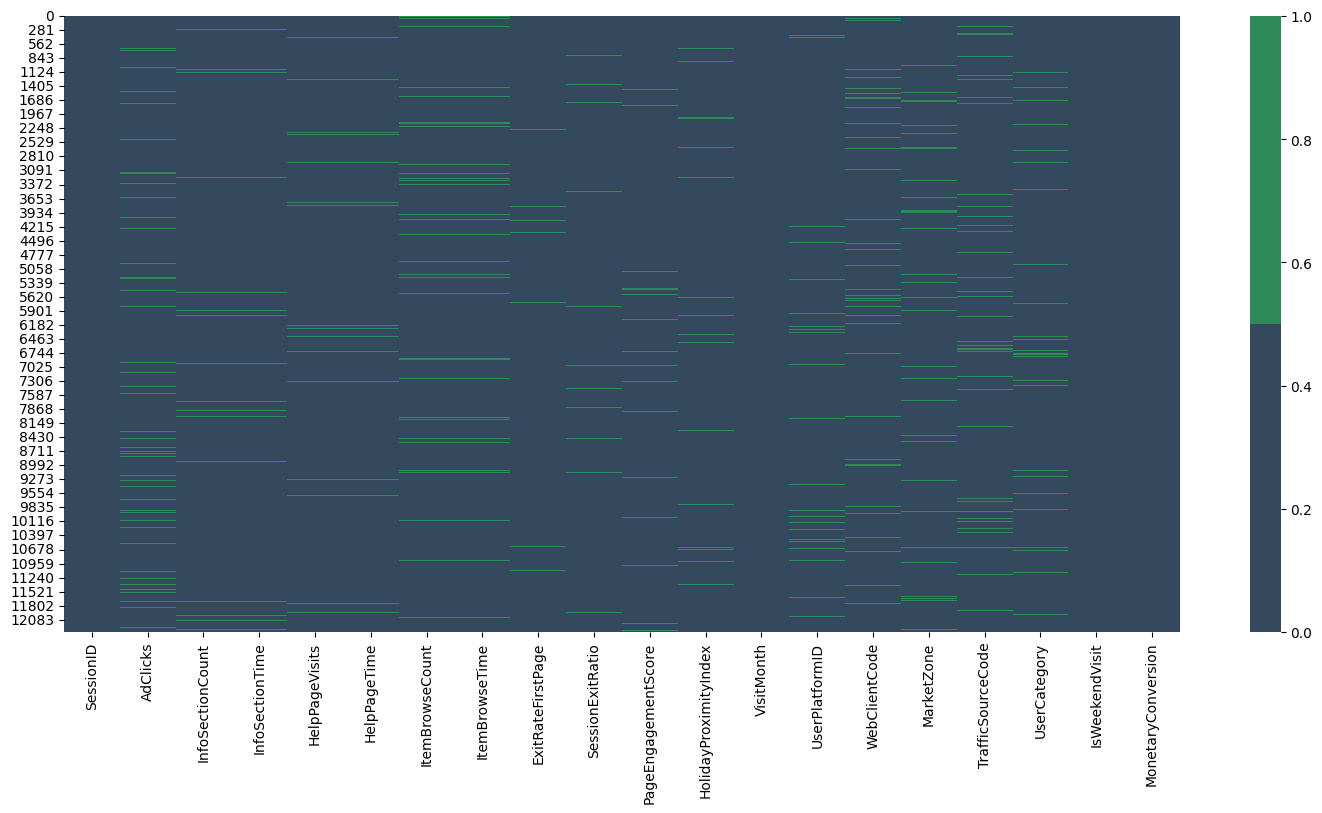

In [8]:
# Visualizing NaN values

plt.figure(figsize=(18,8))

colours = ['#34495E', 'seagreen']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In [9]:
print(df['UserPlatformID'].mode()[0])
print(df['WebClientCode'].mode()[0])
print(df['MarketZone'].mode()[0])
print(df['TrafficSourceCode'].mode()[0])
print(df['UserCategory'].mode()[0])

Android
Chrome
North America
2.0
Returning


##  Handling Missing Values (Imputation)

In [10]:
# AdClicks
df['AdClicks'] = df['AdClicks'].fillna(df['AdClicks'].median())
print(f"Adclicks imputated")

# InfoSectionCount
df['InfoSectionCount'] = df['InfoSectionCount'].fillna(df['InfoSectionCount'].median())
print(f"InfoSectionCount imputated")

# InfoSectionTime
df['InfoSectionTime'] = df['InfoSectionTime'].fillna(df['InfoSectionTime'].median())
print(f"InfoSectionTime imputated")

# HelpPageVisits
df['HelpPageVisits'] = df['HelpPageVisits'].fillna(df['HelpPageVisits'].median())
print(f"HelpPageVisits imputated")

# HelpPageTime
df['HelpPageTime'] = df['HelpPageTime'].fillna(df['HelpPageTime'].median())
print(f"HelpPageTime imputated")

# ItemBrowseCount
df['ItemBrowseCount'] = df['ItemBrowseCount'].fillna(df['ItemBrowseCount'].median())
print(f"ItemBrowseCount imputated")

# ItemBrowseTime
df['ItemBrowseTime'] = df['ItemBrowseTime'].fillna(df['ItemBrowseTime'].median())
print(f"ItemBrowseTime imputated")

# ExitRateFirstPage
df['ExitRateFirstPage'] = df['ExitRateFirstPage'].fillna(df['ExitRateFirstPage'].median())
print(f"ExitRateFirstPage imputated")

# SessionExitRatio
df['SessionExitRatio'] = df['SessionExitRatio'].fillna(df['SessionExitRatio'].median())
print(f"SessionExitRatio imputated")

# PageEngagementScore
df['PageEngagementScore'] = df['PageEngagementScore'].fillna(df['PageEngagementScore'].median())
print(f"PageEngagementScore imputated")

# HolidayProximityIndex
df['HolidayProximityIndex'] = df['HolidayProximityIndex'].fillna(df['HolidayProximityIndex'].median())
print(f"HolidayProximityIndex imputated")


# UserPlatformID
# most_common = df['UserPlatformID'].mode()     # -----> Android
df['UserPlatformID'] = df['UserPlatformID'].fillna(df['UserPlatformID'].mode()[0])
print(f"UserPlatformID imputated")

# WebClientCode
df['WebClientCode'] = df['WebClientCode'].fillna(df['WebClientCode'].mode()[0])
print(f"WebClientCode imputated")

# MarketZone
# most_common = df['MarketZone'].mode()[0]       # ----> North America
df['MarketZone'] = df['MarketZone'].fillna(df['MarketZone'].mode()[0])
print(f"MarketZone imputated")

# TrafficSourceCode
# trafficsourcecode_mode = df['TrafficSourceCode'].mode()[0]       # -----> 2.0
df['TrafficSourceCode'] = df['TrafficSourceCode'].fillna(df['TrafficSourceCode'].mode()[0])
print(f"TrafficSourceCode imputated")

# UserCategory
# usercategory_mode = df['UserCategory'].mode()[0]    # ----> Returning
df['UserCategory'] = df['UserCategory'].fillna(df['UserCategory'].mode()[0])
print(f"UserCategory imputated")

print()
for i in range(20):
  if df.isnull().sum()[i] == 0:
    continue

print('All columns with null values imputatedd!!!!!!!!!!')

Adclicks imputated
InfoSectionCount imputated
InfoSectionTime imputated
HelpPageVisits imputated
HelpPageTime imputated
ItemBrowseCount imputated
ItemBrowseTime imputated
ExitRateFirstPage imputated
SessionExitRatio imputated
PageEngagementScore imputated
HolidayProximityIndex imputated
UserPlatformID imputated
WebClientCode imputated
MarketZone imputated
TrafficSourceCode imputated
UserCategory imputated

All columns with null values imputatedd!!!!!!!!!!


Checking the correlation between the numerical features.

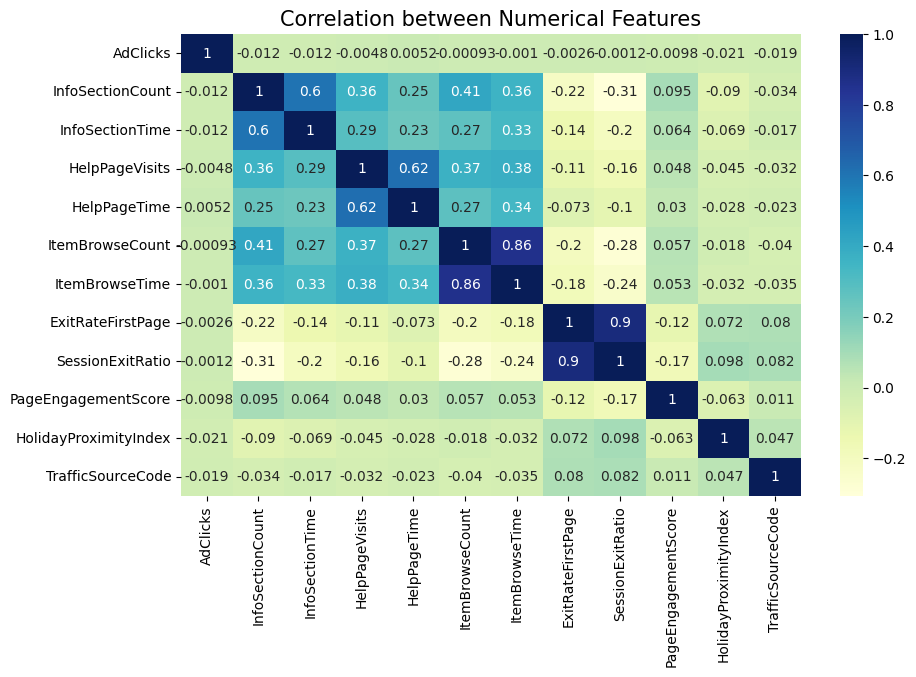

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot= True, cmap='YlGnBu')
plt.title('Correlation between Numerical Features', fontsize=15)
plt.show()

### Bivariate Analysis - How features affect the `MonetaryConversion`

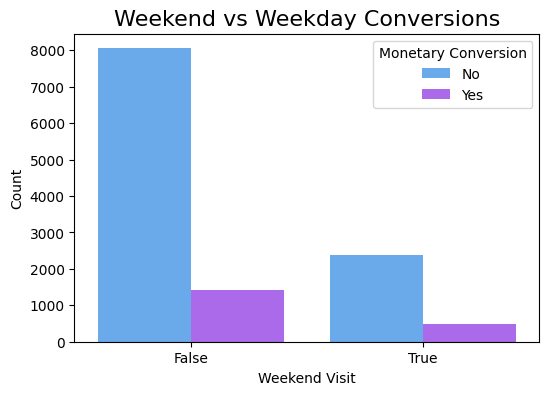

In [12]:
# WeekendVisit v/s MonetaryConversion

plt.figure(figsize=(6,4))
sns.countplot(x='IsWeekendVisit', hue = 'MonetaryConversion', data = df, palette='cool')
plt.title('Weekend vs Weekday Conversions', fontsize=16)
plt.xlabel('Weekend Visit')
plt.ylabel('Count')
plt.legend(title='Monetary Conversion')
plt.show()

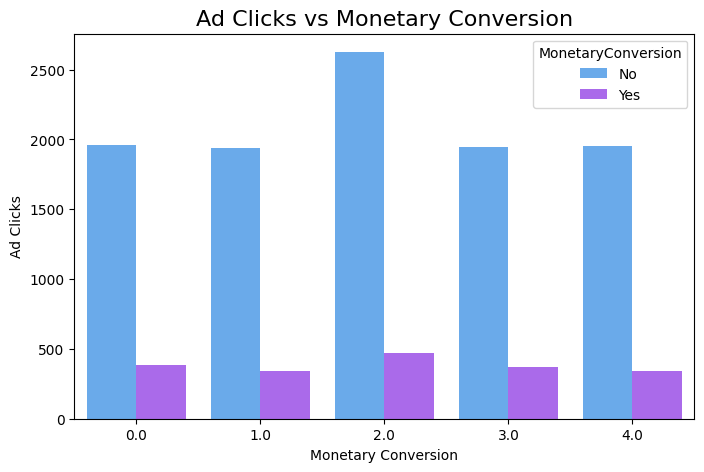

In [13]:
# AdClicks v/s Monetary Conversion

plt.figure(figsize=(8,5))
sns.countplot(x='AdClicks', hue = 'MonetaryConversion', data=df, palette = 'cool')
plt.title('Ad Clicks vs Monetary Conversion', fontsize=16)
plt.xlabel('Monetary Conversion')
plt.ylabel('Ad Clicks')
plt.show()

* Counting the number of different value classes in each categorical columns!

In [14]:
columns = ['MonetaryConversion', 'IsWeekendVisit', 'UserCategory', 'MarketZone', 'WebClientCode', 'UserPlatformID', 'VisitMonth', 'HolidayProximityIndex', 'AdClicks']

for col in columns:
  print(f"             <<Value Counts of {col}>>")
  print(df[col].value_counts())
  print()


             <<Value Counts of MonetaryConversion>>
MonetaryConversion
No     10422
Yes     1908
Name: count, dtype: int64

             <<Value Counts of IsWeekendVisit>>
IsWeekendVisit
False    9462
True     2868
Name: count, dtype: int64

             <<Value Counts of UserCategory>>
UserCategory
Returning    10637
New           1613
Other           80
Name: count, dtype: int64

             <<Value Counts of MarketZone>>
MarketZone
North America      5149
Asia-Pacific       2292
South America      1114
Europe             1073
Middle East         771
Oceania             718
Other               494
Central America     422
Africa              297
Name: count, dtype: int64

             <<Value Counts of WebClientCode>>
WebClientCode
Chrome                8181
Safari                2351
Edge                   690
Firefox                445
Samsung Internet       167
Opera                  154
UC Browser             127
Internet Explorer      100
Brave                   55
Vivaldi      

Checking the overall CONVERSION RATE!


In [15]:
conversion = df['MonetaryConversion'].value_counts()
conversion

,count
MonetaryConversion,
No,10422
Yes,1908


In [16]:
percentage_conversion = conversion / len(df) * 100
print(f"Out of all listed sessions, only about {round(percentage_conversion[1], 2)}% of them get converted to monetary transactions!")

Out of all listed sessions, only about 15.47% of them get converted to monetary transactions!


Checking the CONVERSION RATE monthly!

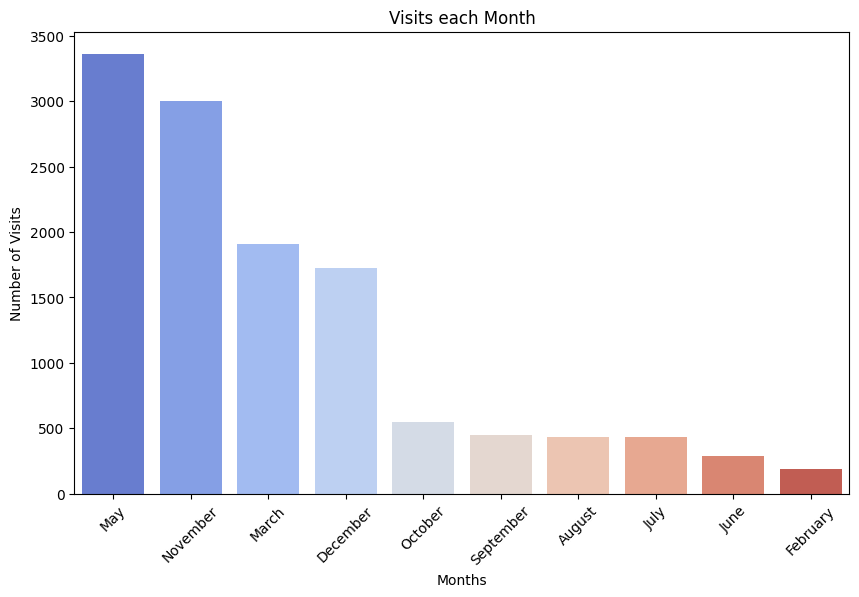

In [17]:
# Visualizing the conversion rate monthly

plt.figure(figsize=(10,6))
sns.countplot(x='VisitMonth', data = df, order = df['VisitMonth'].value_counts().index, palette='coolwarm')
plt.title('Visits each Month')
plt.xlabel('Months')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.show()

In [18]:
months = ['February', 'March', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for month in months:
  month_df = df[df['VisitMonth'] == month]
  conversion = month_df['MonetaryConversion'].value_counts()
  percentage_conversion = conversion / len(month_df) * 100
  # print(f'The total number of sessions in {month} was {len(month_df)}')
  # print(f'The percentage monetary conversion in the month of {month} was {round(percentage_conversion[1], 2)}%')
  print(f'{month}: Sessions - {len(month_df)}, Monetary Conversions - {round(percentage_conversion[1], 2)}%')
  print()

February: Sessions - 184, Monetary Conversions - 1.63%

March: Sessions - 1907, Monetary Conversions - 10.07%

May: Sessions - 3364, Monetary Conversions - 10.85%

June: Sessions - 288, Monetary Conversions - 10.07%

July: Sessions - 432, Monetary Conversions - 15.28%

August: Sessions - 433, Monetary Conversions - 17.55%

September: Sessions - 448, Monetary Conversions - 19.2%

October: Sessions - 549, Monetary Conversions - 20.95%

November: Sessions - 2998, Monetary Conversions - 25.35%

December: Sessions - 1727, Monetary Conversions - 12.51%



> Here we can conclude the highest traffic/reach happens to be in May, and November.. followed by March and Deecember.

In [19]:
df.head(20)

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,February,Windows,Safari,North America,1.0,Returning,False,No
1,eBHG5YGyco8TRlac,4.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,February,Android,Chrome,North America,2.0,Returning,False,No
2,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,February,MacOS,Safari,Other,3.0,Returning,False,No
3,cyOsumxkpNEvKIdc,4.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,February,iOS,Chrome,Europe,4.0,Returning,False,No
4,F4rTMKOqtoPKzxw9,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,February,iOS,Internet Explorer,North America,4.0,Returning,True,No
5,4VMhpHx3vORvMBM6,2.0,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,February,Android,Chrome,North America,3.0,Returning,False,No
6,Sh1EYwNiXcpybejd,4.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,February,Android,Edge,Asia-Pacific,3.0,Returning,False,No
7,qAu6Pi4UMWbv6CUs,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,February,Windows,Chrome,North America,5.0,Returning,True,No
8,isv5YRz1f8xaebTG,2.0,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,February,Android,Chrome,Europe,3.0,Returning,False,No
9,fhZ1zBBiKD6zN76T,1.0,0.0,0.0,0.0,0.0,18.0,598.250000,0.000000,0.022222,0.0,0.4,February,Android,Edge,North America,2.0,Returning,False,No


In [20]:
for col in df.columns:
  print(f'{col}: Min: {min(df[col])}, Max: {max(df[col])}')

SessionID: Min: 00FX0ALALUTfjZIX, Max: zzuXygdLBlcQ9Trs
AdClicks: Min: 0.0, Max: 4.0
InfoSectionCount: Min: 0.0, Max: 27.0
InfoSectionTime: Min: 0.0, Max: 3398.75
HelpPageVisits: Min: 0.0, Max: 24.0
HelpPageTime: Min: 0.0, Max: 2549.375
ItemBrowseCount: Min: 0.0, Max: 705.0
ItemBrowseTime: Min: 0.0, Max: 63973.52223
ExitRateFirstPage: Min: 0.0, Max: 0.2
SessionExitRatio: Min: 0.0, Max: 0.2
PageEngagementScore: Min: 0.0, Max: 361.7637419
HolidayProximityIndex: Min: 0.0, Max: 1.0
VisitMonth: Min: August, Max: September
UserPlatformID: Min: Android, Max: iOS
WebClientCode: Min: Brave, Max: Yandex Browser
MarketZone: Min: Africa, Max: South America
TrafficSourceCode: Min: 1.0, Max: 20.0
UserCategory: Min: New, Max: Returning
IsWeekendVisit: Min: False, Max: True
MonetaryConversion: Min: No, Max: Yes


In [21]:
 df.describe()

,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,TrafficSourceCode
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,1.993917,2.278751,78.690635,0.492539,33.733878,31.169262,1172.754117,0.022043,0.042773,5.709290,0.059335,3.966099
std,1.369830,3.284480,174.978034,1.260653,139.876500,43.576602,1883.061055,0.048345,0.048201,18.304969,0.195901,3.955198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,197.500000,0.000000,0.014286,0.000000,0.000000,2.000000
50%,2.000000,1.000000,8.000000,0.000000,0.000000,18.000000,598.250000,0.003125,0.025222,0.000000,0.000000,2.000000
75%,3.000000,4.000000,89.729167,0.000000,0.000000,37.000000,1408.937500,0.016667,0.050000,0.000000,0.000000,4.000000
max,4.000000,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,20.000000


**Observation:**
1. This matrix says a lot about our data, and the features that we have. For most of our features, the minimum value is `0` while the maximum is like `4`, `27`, `2549`, and even `63973`. This clearly states vastly different scales of data.

2. Comparing the `mean` and `std` of our features, most of them appear to be skewed. So using something like `StandardScaler`, that depends on the mean and standard deviation would still have skewness in the scaled data.

3. Moreover a huge difference between `mean` and `std` tells us about outliers being present in our data. Therefore we can use **Robust Scaling** to handle these outliers while scaling.


---

Let's just classify columns that don't require scaling, while others to either robust scaling or standard scaler!

## Visualizing Outliers using Boxplots

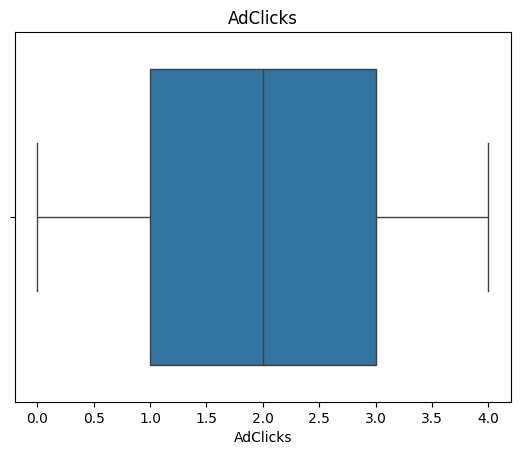

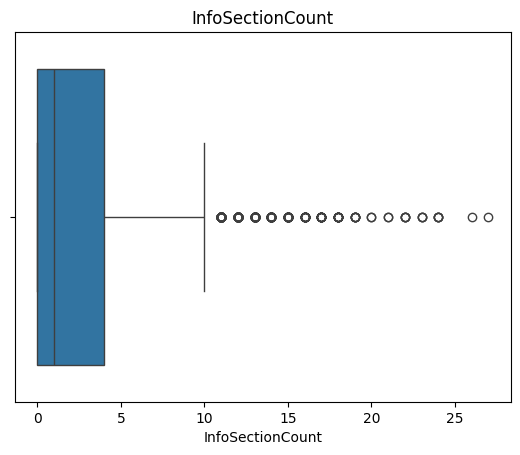

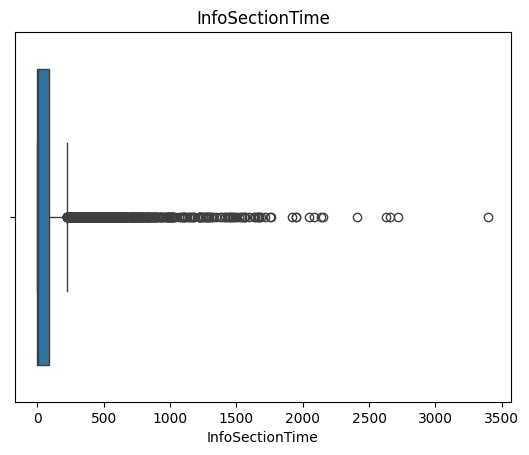

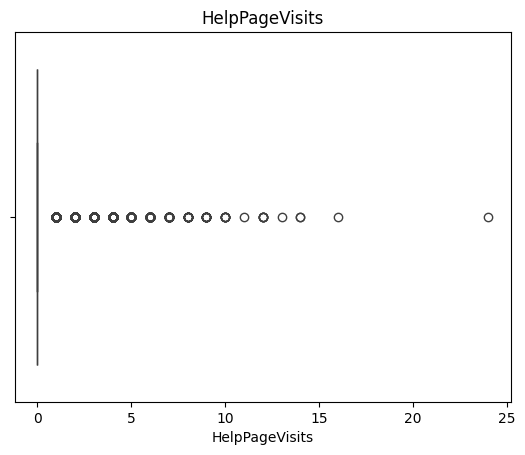

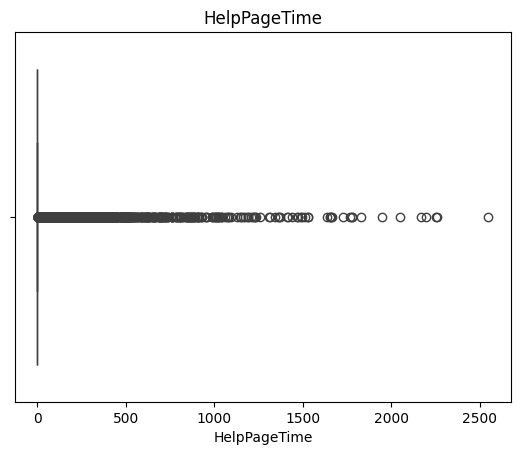

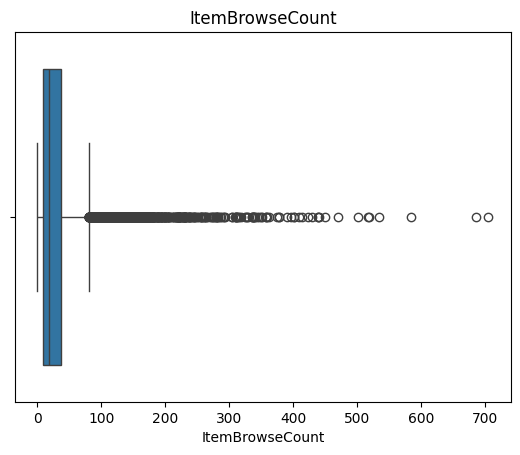

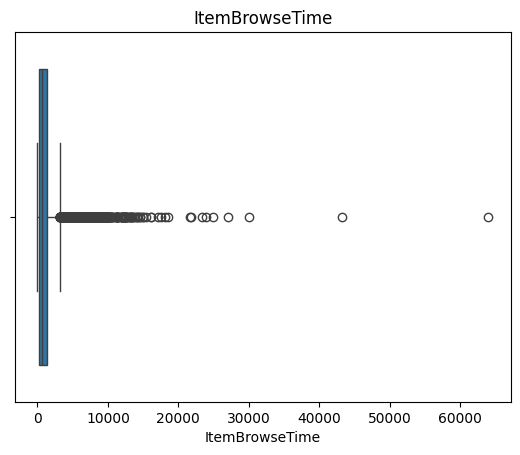

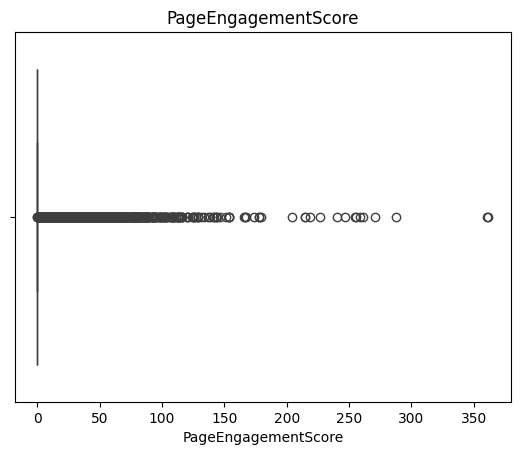

In [22]:
non_category_cols = ['AdClicks', 'InfoSectionCount', 'InfoSectionTime', 'HelpPageVisits', 'HelpPageTime', 'ItemBrowseCount', 'ItemBrowseTime', 'PageEngagementScore']

for col in non_category_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

## Feature Scaling

In [23]:
# from sklearn.preprocessing import StandardScaler, RobustScaler

# features with extreme outliers, for robust scaling
robust_cols = ['InfoSectionTime', 'HelpPageTime', 'ItemBrowseCount', 'ItemBrowseTime', 'PageEngagementScore']
# features with fewer outliers, for standardization
standard_cols = ['InfoSectionCount', 'HelpPageVisits']
# features with no outlier, or that don't need scaling
no_scale_cols = ['AdClicks', 'ExitRateFirstPage', 'SessionExitRatio', 'HolidayProximityIndex', 'TrafficSourceCode']

robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

df[robust_cols] = robust_scaler.fit_transform(df[robust_cols])
df[standard_cols] = standard_scaler.fit_transform(df[standard_cols])

In [24]:
for col in df.columns:
  print(f'{col}: Min: {min(df[col])}, Max: {max(df[col])}')

SessionID: Min: 00FX0ALALUTfjZIX, Max: zzuXygdLBlcQ9Trs
AdClicks: Min: 0.0, Max: 4.0
InfoSectionCount: Min: -0.6938215813376891, Max: 7.526989987268571
InfoSectionTime: Min: -0.0891571859754896, Max: 37.78871604329892
HelpPageVisits: Min: -0.39071695471304374, Max: 18.647807866410602
HelpPageTime: Min: 0.0, Max: 2549.375
ItemBrowseCount: Min: -0.6206896551724138, Max: 23.689655172413794
ItemBrowseTime: Min: -0.4938348035920477, Max: 52.31410800550707
ExitRateFirstPage: Min: 0.0, Max: 0.2
SessionExitRatio: Min: 0.0, Max: 0.2
PageEngagementScore: Min: 0.0, Max: 361.7637419
HolidayProximityIndex: Min: 0.0, Max: 1.0
VisitMonth: Min: August, Max: September
UserPlatformID: Min: Android, Max: iOS
WebClientCode: Min: Brave, Max: Yandex Browser
MarketZone: Min: Africa, Max: South America
TrafficSourceCode: Min: 1.0, Max: 20.0
UserCategory: Min: New, Max: Returning
IsWeekendVisit: Min: False, Max: True
MonetaryConversion: Min: No, Max: Yes


> scaled!!


Visualizing the different platforms that were used to visit!

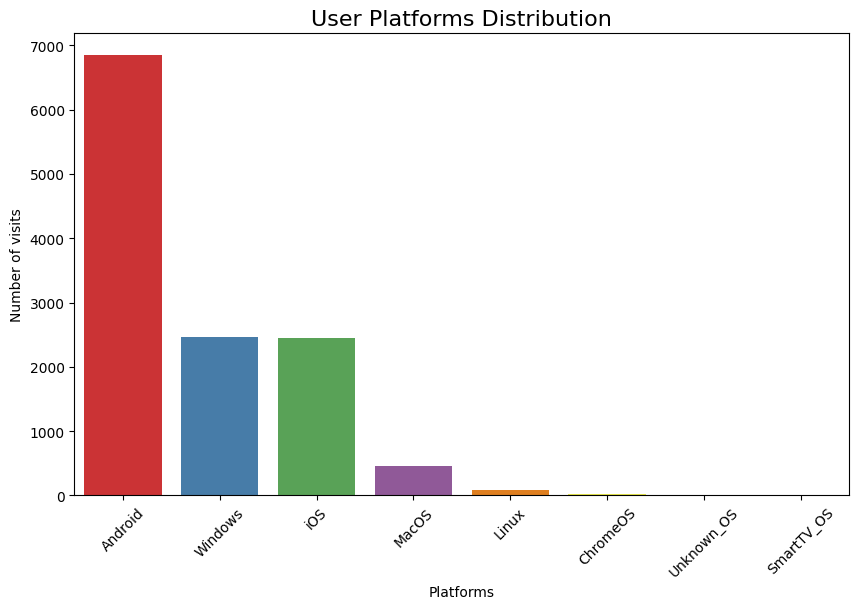

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='UserPlatformID', data = df, order = df['UserPlatformID'].value_counts().index, palette='Set1')
plt.title('User Platforms Distribution', fontsize=16)
plt.xlabel('Platforms')
plt.ylabel('Number of visits')
plt.xticks(rotation=45)
plt.show()

Transforming values of `UserPlatformID` into Mobile or Computer in order to make it easier for encoding.

In [26]:
mobileOS = ['Android', 'iOS']
computerOS = ['Windows', 'MacOS', 'Linux', 'ChromeOS']

def categorize_device(platformID):
    if platformID in mobileOS:
        return 'Mobile'
    elif platformID in computerOS:
        return 'Computer'
    else:
        return 'Other'                 # for unknown_OS, and smartTV_OS

df['DeviceCategory'] = df['UserPlatformID'].apply(categorize_device)
df.drop('UserPlatformID', axis=1, inplace=True)


In [27]:
df.head(10)

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion,DeviceCategory
0,jv3uDyqYltpoXreO,0.0,-0.693822,-0.089157,-0.390717,0.0,-0.586207,-0.493835,0.200000,0.200000,0.0,0.0,February,Safari,North America,1.0,Returning,False,No,Computer
1,eBHG5YGyco8TRlac,4.0,-0.693822,-0.089157,-0.390717,0.0,-0.551724,-0.441005,0.000000,0.100000,0.0,0.0,February,Chrome,North America,2.0,Returning,False,No,Mobile
2,Lz5fuqr91SKGHb5N,0.0,-0.693822,-0.089157,-0.390717,0.0,-0.586207,-0.493835,0.200000,0.200000,0.0,0.0,February,Safari,Other,3.0,Returning,False,No,Computer
3,cyOsumxkpNEvKIdc,4.0,-0.693822,-0.089157,-0.390717,0.0,-0.551724,-0.491634,0.050000,0.140000,0.0,0.0,February,Chrome,Europe,4.0,Returning,False,No,Mobile
4,F4rTMKOqtoPKzxw9,2.0,-0.693822,-0.089157,-0.390717,0.0,-0.275862,0.024145,0.020000,0.050000,0.0,0.0,February,Internet Explorer,North America,4.0,Returning,True,No,Mobile
5,4VMhpHx3vORvMBM6,2.0,-0.693822,-0.089157,-0.390717,0.0,0.034483,-0.366534,0.015789,0.024561,0.0,0.0,February,Chrome,North America,3.0,Returning,False,No,Mobile
6,Sh1EYwNiXcpybejd,4.0,-0.693822,-0.089157,-0.390717,0.0,-0.586207,-0.493835,0.200000,0.200000,0.0,0.4,February,Edge,Asia-Pacific,3.0,Returning,False,No,Mobile
7,qAu6Pi4UMWbv6CUs,1.0,-0.389347,-0.089157,-0.390717,0.0,-0.620690,-0.493835,0.200000,0.200000,0.0,0.0,February,Chrome,North America,5.0,Returning,True,No,Computer
8,isv5YRz1f8xaebTG,2.0,-0.693822,-0.089157,-0.390717,0.0,-0.551724,-0.463293,0.000000,0.100000,0.0,0.8,February,Chrome,Europe,3.0,Returning,False,No,Mobile
9,fhZ1zBBiKD6zN76T,1.0,-0.693822,-0.089157,-0.390717,0.0,0.000000,0.000000,0.000000,0.022222,0.0,0.4,February,Edge,North America,2.0,Returning,False,No,Mobile


### Encoding


In [28]:

# Binary Encoding
df['MonetaryConversion'] = df['MonetaryConversion'].map({'No': 0, 'Yes': 1})
df['IsWeekendVisit'] = df['IsWeekendVisit'].astype(int)

# One-Hot Encoding for multi-category features
ohe_features = ['UserCategory', 'MarketZone', 'WebClientCode', 'DeviceCategory']
df = pd.get_dummies(df, columns=ohe_features, drop_first=True)

# Cyclic Encoding for the month column
'''
Something new(for me) but highly useful as it retains the order and periodicity
of the months, i.e. the model will know December and January are adjacent.
It produces a set of sine and cos angles for each month.
Moreover, something like OHE would have created 12 columns, not feasible.
'''
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11,
    'December': 12
}
df['Month_num'] = df['VisitMonth'].map(month_map)

# Cyclic encoding
df['Month_sin'] = np.sin(2 * np.pi * df['Month_num'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month_num'] / 12)

# Dropping the original
df.drop('VisitMonth', axis=1, inplace=True)

print(df.shape)
df.head()


(12330, 42)


,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,...,WebClientCode_Safari,WebClientCode_Samsung Internet,WebClientCode_UC Browser,WebClientCode_Vivaldi,WebClientCode_Yandex Browser,DeviceCategory_Mobile,DeviceCategory_Other,Month_num,Month_sin,Month_cos
0,jv3uDyqYltpoXreO,0.0,-0.693822,-0.089157,-0.390717,0.0,-0.586207,-0.493835,0.20,0.20,...,True,False,False,False,False,False,False,2,0.866025,0.5
1,eBHG5YGyco8TRlac,4.0,-0.693822,-0.089157,-0.390717,0.0,-0.551724,-0.441005,0.00,0.10,...,False,False,False,False,False,True,False,2,0.866025,0.5
2,Lz5fuqr91SKGHb5N,0.0,-0.693822,-0.089157,-0.390717,0.0,-0.586207,-0.493835,0.20,0.20,...,True,False,False,False,False,False,False,2,0.866025,0.5
3,cyOsumxkpNEvKIdc,4.0,-0.693822,-0.089157,-0.390717,0.0,-0.551724,-0.491634,0.05,0.14,...,False,False,False,False,False,True,False,2,0.866025,0.5
4,F4rTMKOqtoPKzxw9,2.0,-0.693822,-0.089157,-0.390717,0.0,-0.275862,0.024145,0.02,0.05,...,False,False,False,False,False,True,False,2,0.866025,0.5


In [29]:
# df['MonetaryConversion']
# df['IsWeekendVisit']

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['MonetaryConversion', 'SessionID'])     # independent variable
y = df['MonetaryConversion']    # dependent variable

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# 'stratify' ensures the 15.47% imbalance is identical in both train and test sets.

In [31]:
# Checking shape and distribution after train-test split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

print("\nDistribution of o/p in 'y_train':")
print(y_train.value_counts(normalize=True))
print("\nDistribution of target variable in 'y_test':")
print(y_test.value_counts(normalize=True))


X_train shape: (9864, 40)
X_test shape:  (2466, 40)
y_train shape: (9864,)
y_test shape:  (2466,)

Distribution of o/p in 'y_train':
MonetaryConversion
0    0.845296
1    0.154704
Name: proportion, dtype: float64

Distribution of target variable in 'y_test':
MonetaryConversion
0    0.845093
1    0.154907
Name: proportion, dtype: float64


> The identical distribution in `y_train` and `y_test` is due to `stratify=y`

In [32]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

> skipping the oversampling part, because it reduced the model's ability. The recall reduced from finding 68% of all true conversions to only 54% after SMOTE.


## Model Training


### 1. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

Training starts...
Model training complete.

<<< Model Performance Evaluation >>>
Accuracy: 0.8759124087591241

Classification Report:
                   precision    recall  f1-score   support

No Conversion (0)       0.89      0.98      0.93      2084
   Conversion (1)       0.71      0.34      0.46       382

         accuracy                           0.88      2466
        macro avg       0.80      0.66      0.69      2466
     weighted avg       0.86      0.88      0.86      2466

ROC-AUC Score: 0.8775

Generating Confusion Matrix...


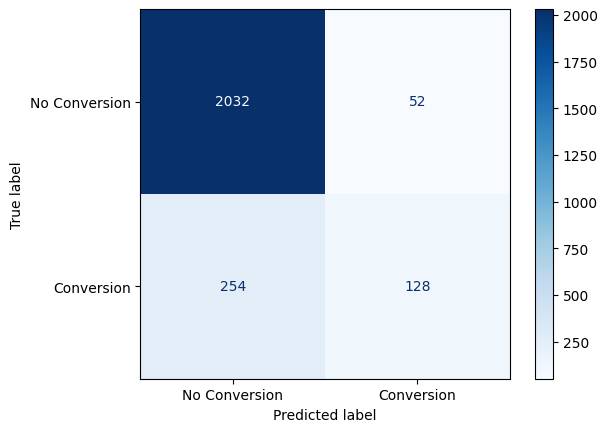

In [34]:
# creating an instance of logistic regr.
model_lr = LogisticRegression()

# training
print("Training starts...")
model_lr.fit(X_train, y_train)
print("Model training complete.")

# prediction
y_pred_lr = model_lr.predict(X_test)
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1] # Probs for 'Yes' class

# model evaluations
print("\n<<< Model Performance Evaluation >>>")
# accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
# Classification Report shows Precision, Recall, and F1-Score for both classes.
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Conversion (0)', 'Conversion (1)']))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba_lr)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Confusion matrix
print("\nGenerating Confusion Matrix...")
cm_logistic = confusion_matrix(y_test, y_pred_lr)
display_cm_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=['No Conversion', 'Conversion'])

display_cm_logistic.plot(cmap='Blues', values_format='d')

### **Observations:**
1. When the model predicts 'Conversion', it is correct 71% of the time.
2. The model only incorrectly flagged 52 people as 'Conversion', which is a good sign though!
3. The model misses 254 out of 382 total conversions, which is POOR.
---
4. The model's ability to distinguish between the 2 classes is very good, as the ROC-AUC score is 0.8775.
5. A Decent Model if not very bad!
It can find potential conversions if it's okay to miss madjority of them!

## 2. Hyperparameter Tune using GridSearchCV

Best parameters found: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}
Accuracy: 0.8613138686131386
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2084
           1       0.54      0.68      0.60       382

    accuracy                           0.86      2466
   macro avg       0.74      0.79      0.76      2466
weighted avg       0.88      0.86      0.87      2466


Generating Confusion Matrix...


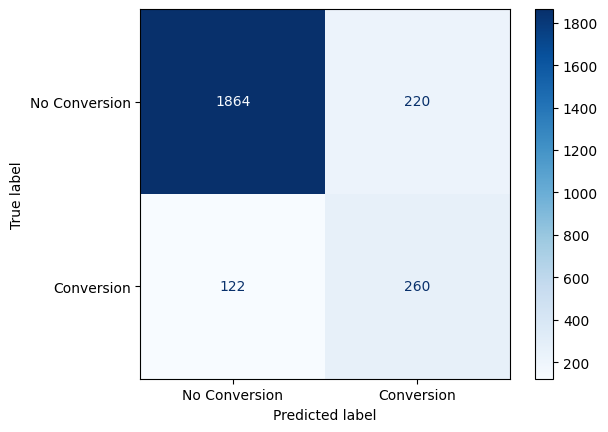

In [35]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(solver='liblinear')

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # "complexity" values
    'penalty': ['l1', 'l2'],        # different regularization types
    'class_weight': [None, 'balanced', {0: 1, 1: 5}, {0: 1, 1: 10}]
}

grid_search_lr = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

print(f"Best parameters found: {grid_search_lr.best_params_}")
best_model = grid_search_lr.best_estimator_

# Evaluate this new best model on your TEST data
predictions = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))

# Confusion matrix
print("\nGenerating Confusion Matrix...")
cm_logistic_cv = confusion_matrix(y_test, predictions)
display_cm_logistic_cv = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_cv, display_labels=['No Conversion', 'Conversion'])

display_cm_logistic_cv.plot(cmap='Blues', values_format='d')

**Observations:**
1. In the best params chosen by gridSearchCV is the `class_weight='balanced'` paramter, which forces the model to treat the "Conversion" class (which is in minority) just as important as the majority class "No Conversion"
2. The new recall value of 0.68 says that the new model finds 68% of the actual conversions, which is big improvement
3. However the accuracy was more earlier but that was because our data was having more of the "No Conversion" class. But in a real world usecase, the first model would fail.
4. The hyperparametric tuned model is a stable one, but comes with a tradeoff as the **precision** dropped from 0.71 to 0.54 as it now flags **220 No Conversion** as **Conversion**
5. The **F1-score** that is a balance between precision and recall improved significantly.

## 3. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9864 entries, 4263 to 11430
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AdClicks                          9864 non-null   float64
 1   InfoSectionCount                  9864 non-null   float64
 2   InfoSectionTime                   9864 non-null   float64
 3   HelpPageVisits                    9864 non-null   float64
 4   HelpPageTime                      9864 non-null   float64
 5   ItemBrowseCount                   9864 non-null   float64
 6   ItemBrowseTime                    9864 non-null   float64
 7   ExitRateFirstPage                 9864 non-null   float64
 8   SessionExitRatio                  9864 non-null   float64
 9   PageEngagementScore               9864 non-null   float64
 10  HolidayProximityIndex             9864 non-null   float64
 11  TrafficSourceCode                 9864 non-null   float64
 12  IsWeeke

In [42]:
# creating an instance and training the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# predictions
y_pred_rf = model_rf.predict(X_test)

# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# probability predictions for first 10 samples. proves biasness
y_pred_proba_rf = model_rf.predict_proba(X_test)
print("\nFirst 10 predictions:\n", y_pred_proba_rf[:10])

Accuracy: 0.8925385239253852

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2084
           1       0.73      0.48      0.58       382

    accuracy                           0.89      2466
   macro avg       0.82      0.72      0.76      2466
weighted avg       0.88      0.89      0.88      2466


First 10 predictions:
 [[0.99 0.01]
 [0.86 0.14]
 [0.26 0.74]
 [0.99 0.01]
 [0.98 0.02]
 [0.97 0.03]
 [0.91 0.09]
 [0.72 0.28]
 [0.8  0.2 ]
 [0.83 0.17]]


**Observations:**
* This model has the best **accuracy** of **89.25%** till now, and even has the highest **precision** of **0.73**
* It's more confident when it classifies a session to **Conversion**
* A downside is that the model still misses 52% of actaul conversions.

## 4. Hyperparameter Tuning on the Random Forest model.

In [48]:
# defining the parameter grid to be used
param_grid2 = {
        'n_estimators': [100, 200],
        'criterion': ['gini'],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False],
        'class_weight': [None, 'balanced']
    }

In [49]:
# instance and model training
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid2, scoring='f1',
                           cv=5, n_jobs=-1, verbose=1)

print("Started GridSearchCV....")
grid_search_rf.fit(X_train, y_train)
print("GridSearchCV completed with the following parameters:")
print(grid_search_rf.best_params_)
print(f'The best F1 score in CV was {grid_search_rf.best_score_: .4f}')

best_model_rf = grid_search_rf.best_estimator_
print(f'The best Random Forest estimator turns out to be {best_model_rf}')

Started GridSearchCV....
Fitting 5 folds for each of 96 candidates, totalling 480 fits
GridSearchCV completed with the following parameters:
{'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
The best F1 score in CV was  0.6741
The best Random Forest estimator turns out to be RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)


Accuracy: 0.8869

Classification Report:
                   precision    recall  f1-score   support

No Conversion (0)       0.93      0.93      0.93      2084
   Conversion (1)       0.64      0.63      0.63       382

         accuracy                           0.89      2466
        macro avg       0.78      0.78      0.78      2466
     weighted avg       0.89      0.89      0.89      2466

First 10 predictions (probabilities [No Conv, Conv]):
[[0.97748342 0.02251658]
 [0.78396495 0.21603505]
 [0.27180352 0.72819648]
 [1.         0.        ]
 [0.98143125 0.01856875]
 [0.9858754  0.0141246 ]
 [0.86909174 0.13090826]
 [0.76940035 0.23059965]
 [0.75650162 0.24349838]
 [0.77097633 0.22902367]]
Generating Confusion Matrix...


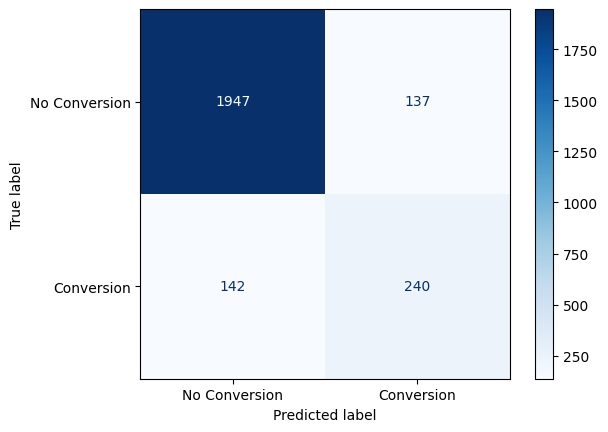

In [50]:
# predictions
prediction_rf_cv = best_model_rf.predict(X_test)

y_pred_proba_rf = best_model_rf.predict_proba(X_test)

# evaluation
accuracy = accuracy_score(y_test, prediction_rf_cv)
print(f'Accuracy: {accuracy:.4f}')
print()
print('Classification Report:')
print(classification_report(y_test, prediction_rf_cv, target_names=['No Conversion (0)', 'Conversion (1)']))

# probability predictions
print("First 10 predictions (probabilities [No Conv, Conv]):")
print(y_pred_proba_rf[:10])


# Confusion Matrix
print("Generating Confusion Matrix...")
ConfusionMatrixDisplay.from_estimator(best_model_rf, X_test, y_test,
                                      display_labels=['No Conversion', 'Conversion'],
                                      cmap='Blues')
plt.show()

**Observations:**
1. Hyperpara tuning improved the recall from 0.48 (i.e. missing more than half the conversions) to 0.63 (now finds 63% of the all conversions)
2. The improvement was made mostly due to `class_weight='balanced'` parameter chosen.


Choice for a model:

**Model 2 (Tuned LogReg)** if only goal is to find the maximum number of potential conversions

**Model 4 (Tuned RF)** if we want a strong, balanced model. It finds **almost** as many conversions as Model 2 (Recall: 0.63 vs 0.68) but is **significantly more** precise when it does (Precision: 0.64 vs 0.54). This makes it more efficient and the better all-around choice.

---

### Random Forest builds many trees independently and trains them parallely (i.e. Bagging). The next model we can try is Gradient Boosting which trains the models sequentially focussing on correcting the mistakes made by the previous models.

### The key problem we have encountered is the tradeoff between precision and recall for the conversion class. This algorithm has the parameter `scale_pos_weight`. Instead of simply using `class_weight='balanced'` the new parameter specifies **how much important hte `Conversion` class is than the `No Conversion` class.**


## 5. **XGBoost with Hyperparameter Tuning**

In [51]:
# !pip install xgboost

import xgboost as xgb
from collections import Counter

counts = Counter(y_train)
scale_pos_weight = counts[0] / counts[1]
print(f"scale_pos_weight for our training data: {scale_pos_weight:.2f}")

scale_pos_weight for our training data: 5.46


In [53]:
# creating an instance
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# defining the parameter grid to search
param_grid = {
    'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.05],
    'scale_pos_weight': [scale_pos_weight, 5.0, 6.0]        # tuning around our calculated ratio
}


print("Starting GridSearchCV for XGBoost.......")
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='f1', cv=5, n_jobs=-1, verbose=1)
# model training
grid_search_xgb.fit(X_train, y_train)

print("Done!")

Starting GridSearchCV for XGBoost.......
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Done!


In [54]:
# best parameters
print(f"Best parameters found: {grid_search_xgb.best_params_}")
print(f"Best F1-score during CV: {grid_search_xgb.best_score_:.4f}")

# best model for evaluation
best_xgb_model = grid_search_xgb.best_estimator_

# predictions
y_pred_xgb = best_xgb_model.predict(X_test)
y_pred_xgb_proba = best_xgb_model.predict_proba(X_test)

Best parameters found: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'scale_pos_weight': 5.463958060288335}
Best F1-score during CV: 0.6587


Accuracy: 0.8771

Classification Report:
                   precision    recall  f1-score   support

No Conversion (0)       0.95      0.90      0.93      2084
   Conversion (1)       0.58      0.74      0.65       382

         accuracy                           0.88      2466
        macro avg       0.77      0.82      0.79      2466
     weighted avg       0.89      0.88      0.88      2466


First 10 predictions (probabilities [No Conv, Conv]):
[[0.9886623  0.01133769]
 [0.6885089  0.31149107]
 [0.0391525  0.9608475 ]
 [0.9971671  0.0028329 ]
 [0.9963562  0.00364378]
 [0.98749703 0.01250295]
 [0.93478215 0.06521784]
 [0.9247732  0.07522676]
 [0.89462274 0.10537726]
 [0.6814599  0.3185401 ]]



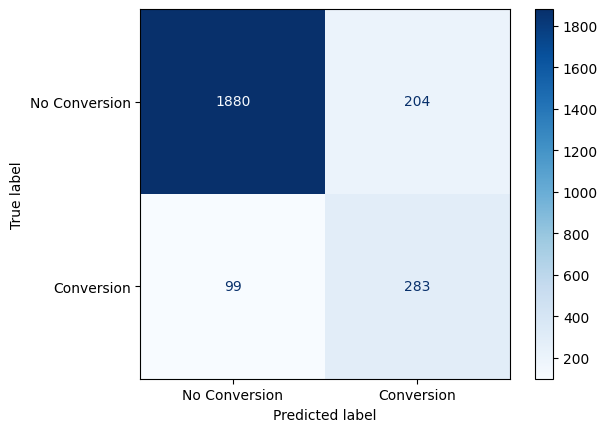

In [55]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

print()

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Conversion (0)', 'Conversion (1)']))

print()
# probability predictions
print("First 10 predictions (probabilities [No Conv, Conv]):")
print(y_pred_xgb_proba[:10])

print()

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_xgb_model, X_test, y_test,
                                      display_labels=['No Conversion', 'Conversion'],
                                      cmap='Blues')
plt.show()

# **Final Observations**

### Our tuned XGBoost model is the best for our business goals.
1. **Highest Recall:** It finds 74% of actual conversions, and this is the highest of all the models we built. Therefore, it misses the fewest opportunities.

2. **Highest F1 score:** This model has the highest F1 score, which provides the best balance between the precision(being correct on finding conversions) and recall(finding conversions).

3. This model missed just 99 conversions, which is the least among all. It indentifies the most conversion opportunities.